In [1]:
#This notebook is a part of My Capstone Project carried out during my enrollment in data science career Track

In [10]:
#importing required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline 

import seaborn as sns
sns.set(style="whitegrid")

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV


# DATA WRANGLING STEPS

In [11]:
#reading csv into dataframe object

df = pd.read_csv('BlackFriday.csv')

In [12]:
#getting the size of dataset
df.shape

(537577, 12)

In [13]:
#getting info about first five rows of dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [14]:
#getting information about datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


## Checking for null values

In [15]:
df.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.310627
Product_Category_3            0.694410
Purchase                      0.000000
dtype: float64

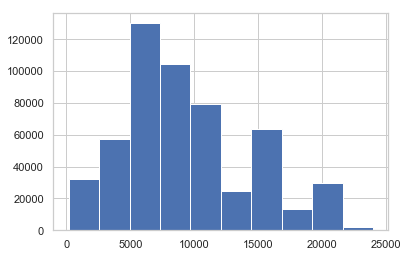

In [112]:
df.Purchase.hist()



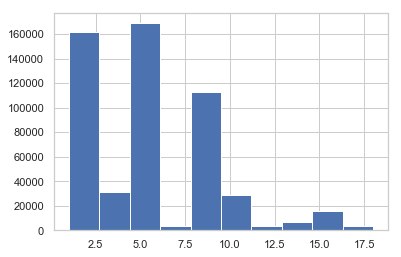

In [16]:
df.Product_Category_1.hist()



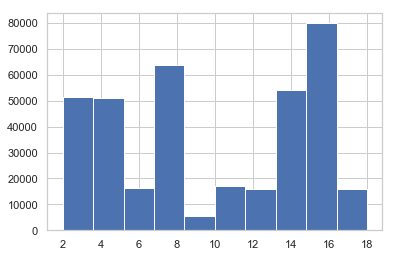

In [17]:
df.Product_Category_2.hist()



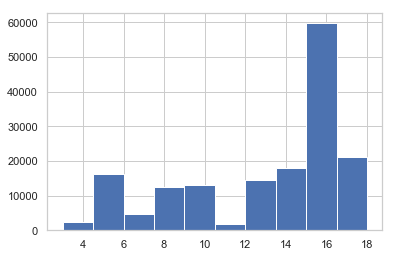

In [18]:
df.Product_Category_3.hist()



In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(df.Purchase)
plt.xticks([])
plt.xlabel('Purcahse',fontsize=14)
plt.ylabel('')
plt.title('Distribution of Purchase',fontsize=14)
plt.figure(figsize=(20,5))


plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Age',fontsize=14)

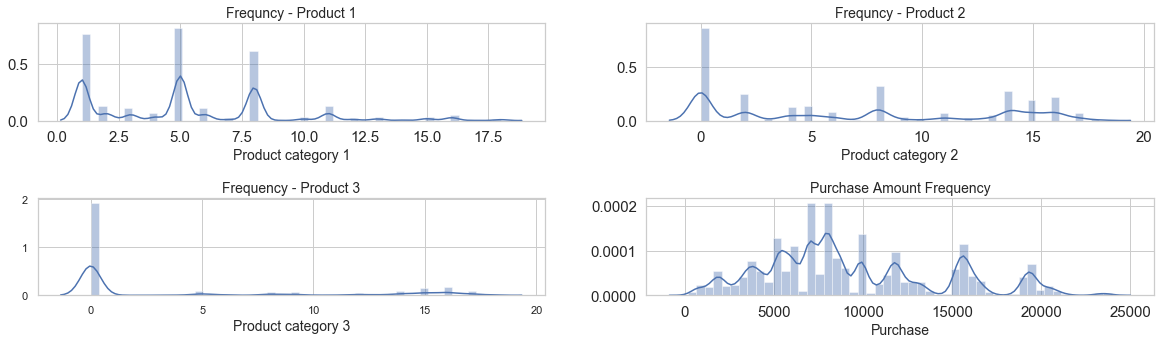

In [132]:
fig = plt.figure(figsize=(20,5))


plt.subplot(221)
sns.distplot(df.Product_Category_1)
plt.subplots_adjust(hspace = 0.8)

plt.title('Frequncy - Product 1',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.tick_params(labelsize=15)

plt.subplot(222)
sns.distplot(df.Product_Category_2)
plt.title('Frequncy - Product 2',fontsize=14)
plt.xlabel('Product category 2',fontsize=14)
plt.ylabel('')

plt.tick_params(labelsize=15)


plt.subplot(223)
sns.distplot(df.Product_Category_3)
plt.title('Frequency - Product 3',fontsize=14)
plt.xlabel('Product category 3',fontsize=14)
plt.ylabel('')

plt.subplot(224)
sns.distplot(df.Purchase)
plt.title('Purchase Amount Frequency',fontsize=14)
plt.xlabel('Purchase',fontsize=14)
plt.ylabel('')




plt.tick_params(labelsize=15)

# As per above histogram distribution for Product Category is non-normal distribution.However while imputing missing value ,we can replace the 'nan' value with 0 ,considering non-purchase of product.

In [133]:

df['Product_Category_2'] = df['Product_Category_2'].replace('nan', np.nan).fillna(0)


In [134]:
df['Product_Category_3'] = df['Product_Category_3'].replace('nan', np.nan).fillna(0)



In [135]:
# dataset summary stats
df.describe()

,User_ID,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,1.859458,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,1.289828,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,1.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,2.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,3.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,4.000000,18.000000,18.000000,18.000000,23961.000000


In [136]:
# converting variables to suitable types
df['Product_ID'] = df.Product_ID.astype('category')
df['Gender'] = df.Gender.astype('category')
df['Age'] = df.Age.astype('category')
df['Occupation'] = df.Occupation.astype('category')

df['City_Category'] = df.City_Category.astype('category')


df['Marital_Status'] = df.Marital_Status.astype('category')
df['Product_Category_2'] = df.Product_Category_2.astype('int')
df['Product_Category_3'] = df.Product_Category_3.astype('int')

#df['Stay_In_Current_City_Years'] = df.Stay_In_Current_City_Years.astype('category')



In [137]:

#removing special character from column values of column 'Stay_In_Current_City_Years' and converting to integer

if df['Stay_In_Current_City_Years'].dtype != 'int64':
    df['Stay_In_Current_City_Years'] = (df['Stay_In_Current_City_Years'].str.strip('+').astype(int))

In [138]:
#observe the converted datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null category
Gender                        537577 non-null category
Age                           537577 non-null category
Occupation                    537577 non-null category
City_Category                 537577 non-null category
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null category
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: category(6), int64(6)
memory usage: 28.4 MB


# Outlier Detection

Text(0, 0.5, 'Count')

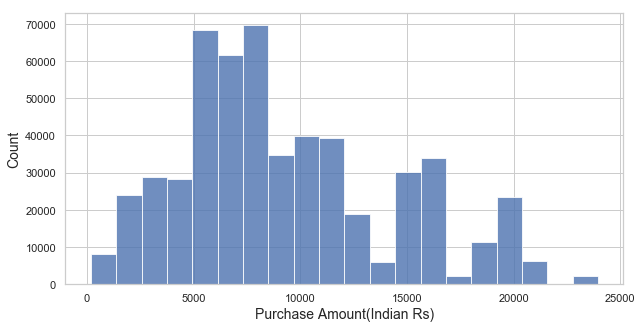

In [139]:
#distribution of purchase amount variable 
plt.figure(figsize=(10,5))
plt.hist(df['Purchase'],bins=20, alpha=0.8)
plt.xlabel('Purchase Amount(Indian Rs)',fontsize=14)
plt.ylabel('Count',fontsize=14)


In [140]:
#Distribution of product category 

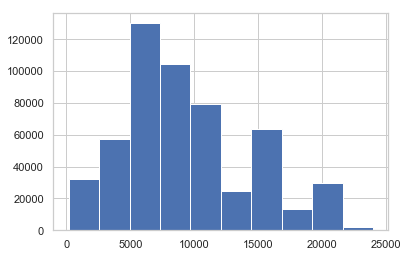

In [141]:
df.Purchase.hist()

In [142]:
scipy.stats.normaltest(df.Product_Category_2, axis=0)

NormaltestResult(statistic=7654.842090958571, pvalue=0.0)

In [143]:
scipy.stats.normaltest(df.Product_Category_3, axis=0)

NormaltestResult(statistic=85749.33031185293, pvalue=0.0)

# Box-Plot to see the distribution of values in Product Category

In [144]:
data = df[['Product_Category_1','Product_Category_2','Product_Category_3']]

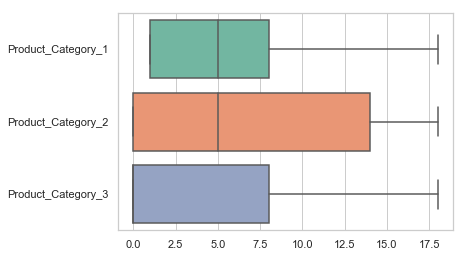

In [145]:
 ax = sns.boxplot(data=data, orient="h", palette="Set2")

# Exploratory Data Analysis

In [146]:
#Lets observe the number of unique values
for col in df.columns:
    print('{} unique element: {}'.format(col,df[col].nunique()))

User_ID unique element: 5891
Product_ID unique element: 3623
Gender unique element: 2
Age unique element: 7
Occupation unique element: 21
City_Category unique element: 3
Stay_In_Current_City_Years unique element: 5
Marital_Status unique element: 2
Product_Category_1 unique element: 18
Product_Category_2 unique element: 18
Product_Category_3 unique element: 16
Purchase unique element: 17959


# User_Id distribution seperated by Gender and Age

Text(0.5, 1.0, 'Average purchase by Age')

<Figure size 1440x360 with 0 Axes>

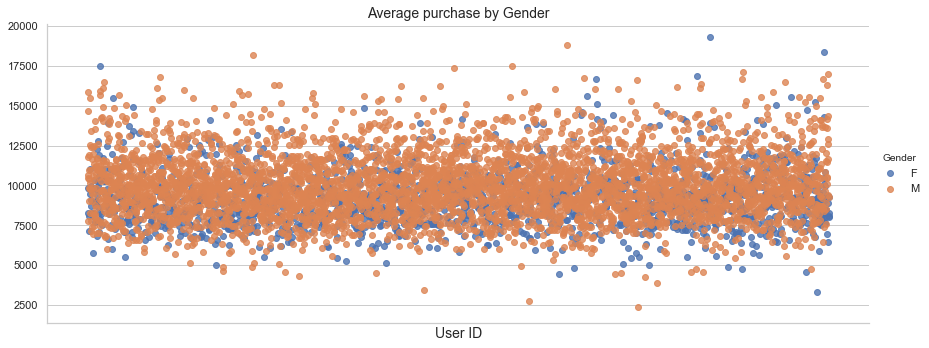

<Figure size 1440x360 with 0 Axes>

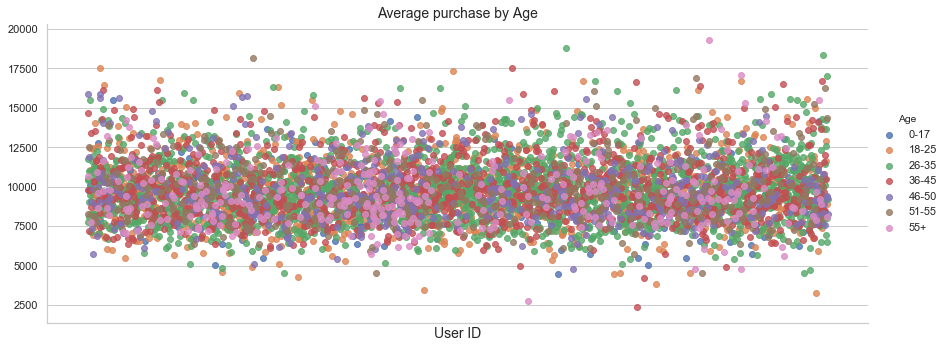

In [147]:
df_Apurchase_by_UID_Gender = df.groupby(['User_ID','Gender']).agg({'Purchase':np.mean}).reset_index()
df_Apurchase_by_UID_Age = df.groupby(['User_ID','Age']).agg({'Purchase':np.mean}).reset_index()
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']

plt.figure(figsize=(20,5))
sns.lmplot('User_ID','Purchase',data=df_Apurchase_by_UID_Gender,fit_reg=False,hue='Gender',aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Gender',fontsize=14)
plt.figure(figsize=(20,5))
sns.lmplot('User_ID','Purchase',data=df_Apurchase_by_UID_Age,fit_reg=False,hue='Age',hue_order=age_order,aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Age',fontsize=14)

# Distribution for Target column i.e. Purchase 

Text(0, 0.5, 'Count')

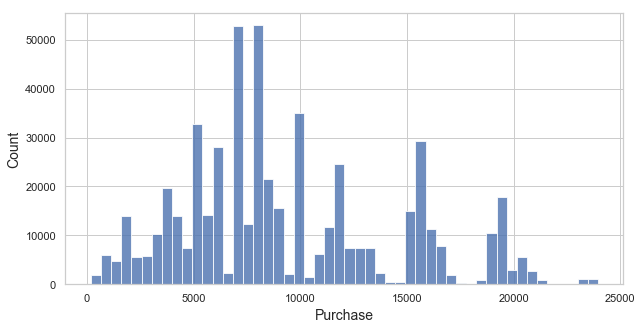

In [148]:
plt.figure(figsize=(10,5))
plt.hist(df['Purchase'],bins=50, alpha=0.8)
plt.xlabel('Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)

# Distribution of sales as per 3 product categories

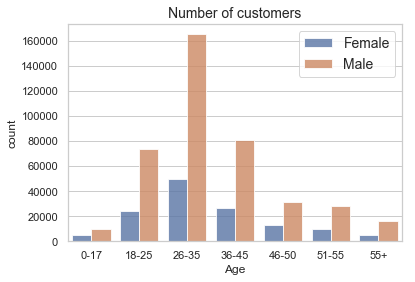

In [149]:
sns.countplot('Age',order=age_order,hue='Gender',data=df,alpha = 0.8)
plt.title('Number of customers',fontsize=14)
plt.legend(['Female','Male'],frameon=True,fontsize=14)



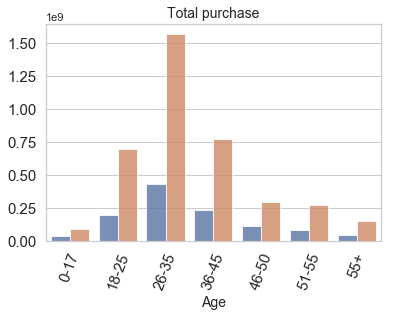

In [150]:
df_Tpurchase_by_Age = df.groupby(['Age','Gender']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Tpurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Total purchase',fontsize=14)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)

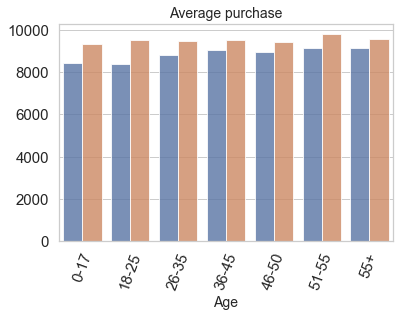

In [151]:
df_Apurchase_by_Age = df.groupby(['Age','Gender']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Apurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Average purchase',fontsize=14)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Number of customers')

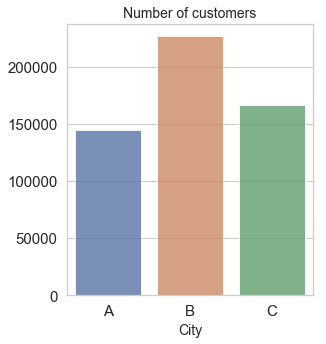

In [38]:
city_order = ['A','B','C']
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot('City_Category',order=city_order,data=df,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
plt.title('Number of customers',fontsize=14)

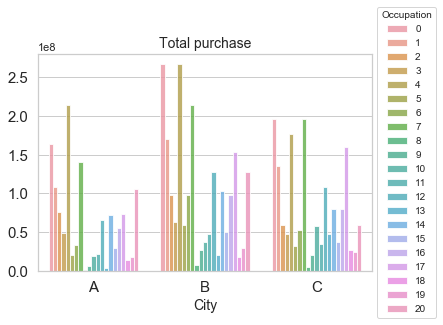

In [39]:
df_Tpurchase_by_City = df.groupby(['City_Category','Occupation']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('City_Category','Purchase',hue='Occupation',data=df_Tpurchase_by_City,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(title='Occupation',frameon=True,fontsize=10,bbox_to_anchor=(1,0.5), loc="center left")
plt.tick_params(labelsize=15)
#plt.legend().set_visible(False)
#plt.tick_params(labelsize=15)

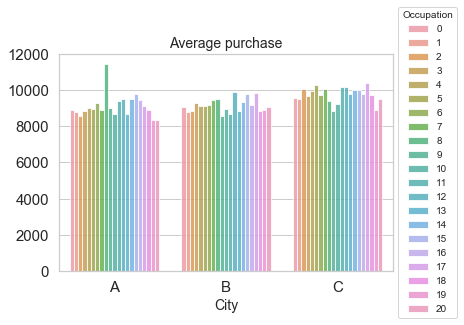

In [40]:
df_Apurchase_by_City = df.groupby(['City_Category','Occupation']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('City_Category','Purchase',hue='Occupation',data=df_Apurchase_by_City,alpha = 0.8)
plt.title('Average purchase',fontsize=14)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(title='Occupation',frameon=True,fontsize=10,bbox_to_anchor=(1,0.5), loc="center left")
plt.tick_params(labelsize=15)

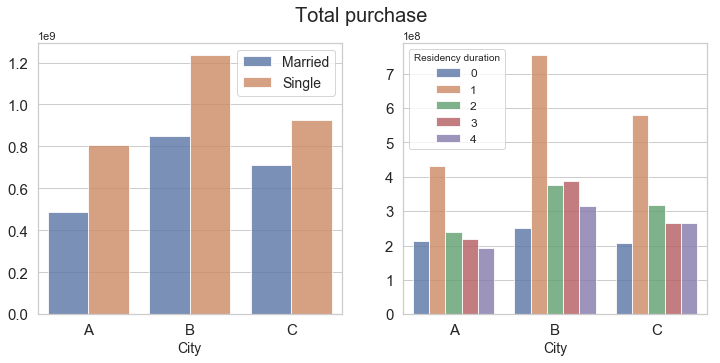

In [41]:
df['Marital_Status_label']=np.where(df['Marital_Status'] == 0,'Single','Married')
df_Tpurchase_by_City_Marital = df.groupby(['City_Category','Marital_Status_label']).agg({'Purchase':np.sum}).reset_index()
df_Tpurchase_by_City_Stay = df.groupby(['City_Category','Stay_In_Current_City_Years']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
fig.suptitle('Total purchase',fontsize=20)
plt.subplot(121)
sns.barplot('City_Category','Purchase',hue='Marital_Status_label',data=df_Tpurchase_by_City_Marital,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('City_Category','Purchase',hue='Stay_In_Current_City_Years',data=df_Tpurchase_by_City_Stay,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(title='Residency duration',frameon=True,fontsize=12,loc=2)
plt.tick_params(labelsize=15)
df.drop('Marital_Status_label',axis=1,inplace=True)

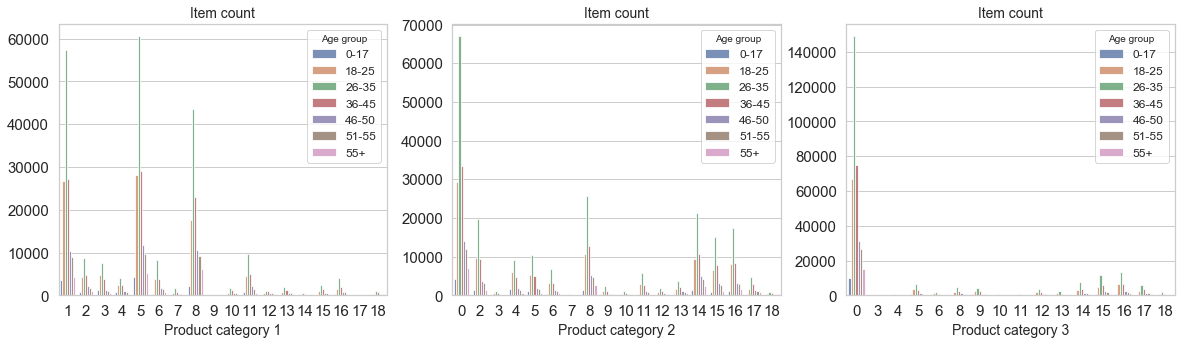

In [42]:
fig = plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot('Product_Category_1',hue='Age',data=df,alpha = 0.8,hue_order=age_order)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(title='Age group',frameon=True,fontsize=12)
plt.tick_params(labelsize=15)
plt.subplot(132)
sns.countplot('Product_Category_2',hue='Age',data=df,alpha = 0.8,hue_order=age_order)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 2',fontsize=14)
plt.ylabel('')
plt.legend(title='Age group',frameon=True,fontsize=12)
plt.tick_params(labelsize=15)
plt.subplot(133)
sns.countplot('Product_Category_3',hue='Age',data=df,alpha = 0.8,hue_order=age_order)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 3',fontsize=14)
plt.ylabel('')
plt.legend(title='Age group',frameon=True,fontsize=12)
plt.tick_params(labelsize=15)



In [43]:
df_Tpurchase_by_PC1_Age = df.groupby(['Product_Category_1','Age']).agg({'Purchase':np.sum}).reset_index()
df_Tpurchase_by_PC2_Age = df.groupby(['Product_Category_2','Age']).agg({'Purchase':np.sum}).reset_index()

df_Tpurchase_by_PC3_Age = df.groupby(['Product_Category_3','Age']).agg({'Purchase':np.sum}).reset_index()




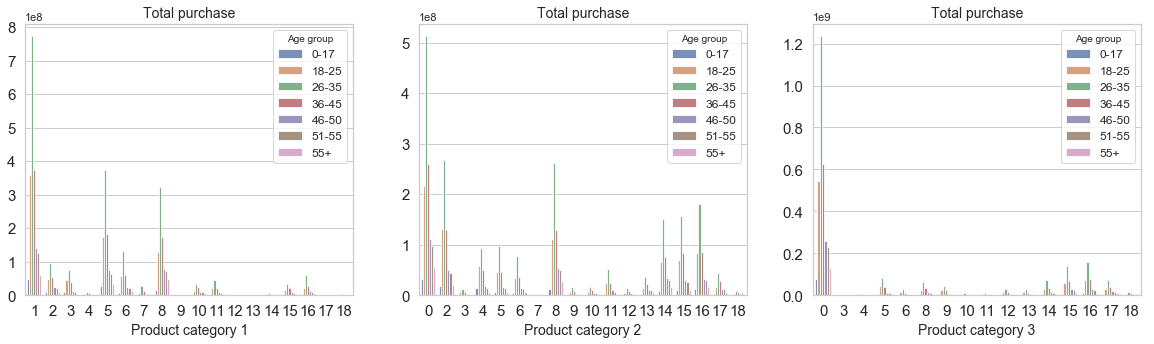

In [44]:
fig = plt.figure(figsize=(20,5))
plt.subplot(131)
sns.barplot('Product_Category_1','Purchase',hue='Age',data=df_Tpurchase_by_PC1_Age,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(title='Age group',frameon=True,fontsize=12)
plt.tick_params(labelsize=15)




plt.subplot(132)
sns.barplot('Product_Category_2','Purchase',hue='Age',data=df_Tpurchase_by_PC2_Age,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 2',fontsize=14)
plt.ylabel('')
plt.legend(title='Age group',frameon=True,fontsize=12)
plt.tick_params(labelsize=15)


plt.subplot(133)
sns.barplot('Product_Category_3','Purchase',hue='Age',data=df_Tpurchase_by_PC3_Age,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 3',fontsize=14)
plt.ylabel('')
plt.legend(title='Age group',frameon=True,fontsize=12)
plt.tick_params(labelsize=15)



In [45]:
df_Tpurchase_by_PC1_Gender = df.groupby(['Product_Category_1','Gender']).agg({'Purchase':np.sum}).reset_index()
df_Tpurchase_by_PC2_Gender = df.groupby(['Product_Category_2','Gender']).agg({'Purchase':np.sum}).reset_index()

df_Tpurchase_by_PC3_Gender = df.groupby(['Product_Category_3','Gender']).agg({'Purchase':np.sum}).reset_index()



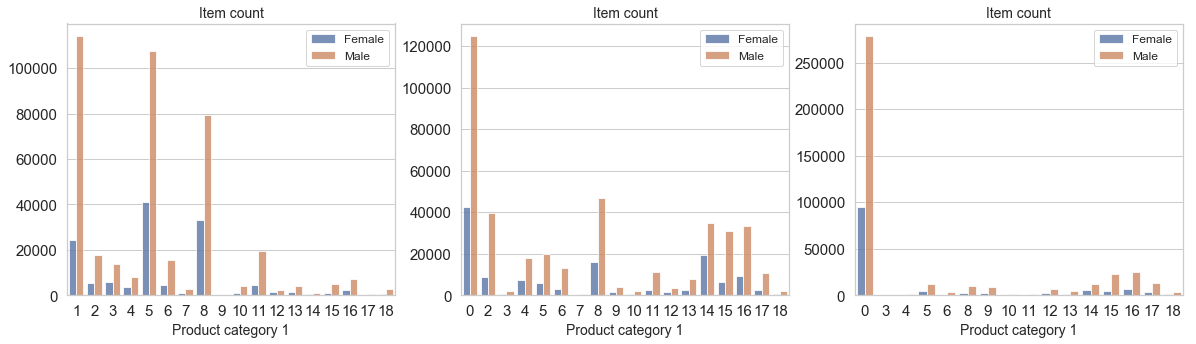

In [46]:

fig = plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot('Product_Category_1',hue='Gender',data=df,alpha = 0.8)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(['Female','Male'],frameon=True,fontsize=12)
plt.tick_params(labelsize=15)

plt.subplot(132)
sns.countplot('Product_Category_2',hue='Gender',data=df,alpha = 0.8)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(['Female','Male'],frameon=True,fontsize=12)
plt.tick_params(labelsize=15)



plt.subplot(133)
sns.countplot('Product_Category_3',hue='Gender',data=df,alpha = 0.8)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(['Female','Male'],frameon=True,fontsize=12)
plt.tick_params(labelsize=15)




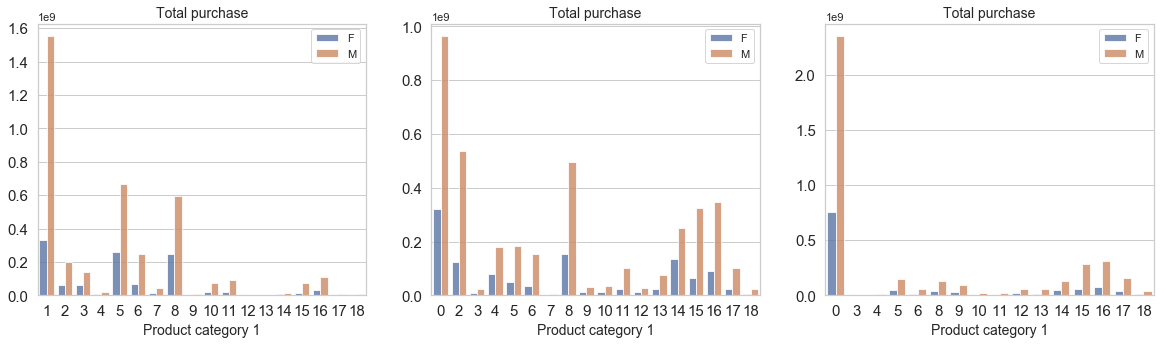

In [47]:
fig = plt.figure(figsize=(20,5))


plt.subplot(131)
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df_Tpurchase_by_PC1_Gender,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(True)
plt.tick_params(labelsize=15)

plt.subplot(132)
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df_Tpurchase_by_PC2_Gender,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(True)
plt.tick_params(labelsize=15)


plt.subplot(133)
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df_Tpurchase_by_PC3_Gender,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(True)


plt.tick_params(labelsize=15)


# Observations

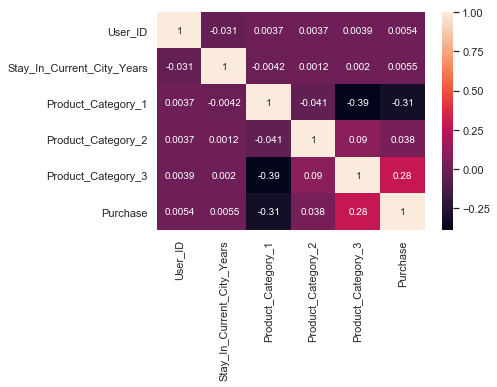

In [76]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

Based on above plot there seems to be moderate co-relation between Puchase,Product_Category_1,Product_Category_2,Product_Category_3
Lets explore these in more detail as below:

The above plot leads me to believe that we are violating the assumption of homoscedasticity between the variables
because our variables have non-Guassian distribution.

To formally test homogeneity of variances, I will use the Levene’s test of homogeneity of variances which is the stats.levene() method from scipy.stats

In [111]:

stats.levene(df['Product_Category_3'], df['Purchase'])



LeveneResult(statistic=716296.5543791881, pvalue=0.0)

Levene’s test for equal variances is significant, meaning we violate the assumption of homoscedasticity. Given that, the appropriate correlation test to use would be a non-parametric test such as the Spearman rank correlation or Kendall Tau correlation test

In [104]:
#samples are not co-related
stats.kendalltau(df['Product_Category_1'], df['Purchase'])


KendalltauResult(correlation=-0.0003062067187883061, pvalue=0.7567461533978266)

In [105]:
#samples have weak co-relation
stats.kendalltau(df['Product_Category_2'], df['Purchase'])


KendalltauResult(correlation=0.058297834013730385, pvalue=0.0)

In [106]:
#moderately corelated
stats.kendalltau(df['Product_Category_3'], df['Purchase'])



KendalltauResult(correlation=0.23042597015564764, pvalue=0.0)

In [102]:
stats.levene(df['Product_Category_1'], df['Product_Category_3'])



LeveneResult(statistic=13372.94505516065, pvalue=0.0)

In [108]:
#not co-related
stats.kendalltau(df['Product_Category_3'], df['Product_Category_1'])



KendalltauResult(correlation=0.0015572338010643554, pvalue=0.16884063620435807)

In [110]:
#not co-related


stats.kendalltau(df['Product_Category_1'], df['Product_Category_2'])



KendalltauResult(correlation=-0.001480541717058773, pvalue=0.15918553694760273)

# Inferential Statistics

In [49]:
# INFERENTIAL STATISTICS

In [50]:
#Normality test for Purchase variable

scipy.stats.normaltest(df.Purchase, axis=0)



NormaltestResult(statistic=33564.58168411379, pvalue=0.0)

In [51]:
#Normality test for Product Category 1

scipy.stats.normaltest(df.Product_Category_1, axis=0)

NormaltestResult(statistic=57119.06458155994, pvalue=0.0)

In [52]:
#Normality test for Product Category 2
scipy.stats.normaltest(df.Product_Category_2, axis=0)


NormaltestResult(statistic=7654.842090958571, pvalue=0.0)

In [53]:
#Normality test for Product Category 3

scipy.stats.normaltest(df.Product_Category_3, axis=0)



NormaltestResult(statistic=85749.33031185293, pvalue=0.0)

## H0 --  Mean Purchase amount for male and female is same
## H1 --  Mean Purchase amonut is different in male and female

In [54]:
df.groupby(['Gender']).agg({'Purchase':np.mean}).reset_index()


,Gender,Purchase
0,F,8809.761349
1,M,9504.771713


In [ ]:

plt.show()


In [55]:
df_Apurchase_by_gender = df[['Gender','Purchase']]

female = df_Apurchase_by_gender[(df_Apurchase_by_gender.Gender=='F')]
female.reset_index(inplace=True)

male = df_Apurchase_by_gender[(df_Apurchase_by_gender.Gender=='M')]
male.reset_index(inplace=True)

In [56]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
data1 =female.Purchase
data2 = male.Purchase
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=24853729219.500, p=0.000
Different distribution (reject H0)


## H0- All the products have same order quantity
## H1 - All the products have different order quantity

In [57]:
df_product_Purchase = df[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]


In [58]:
# Kruskal-Wallis H-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# generate three independent samples
data1 = df.Product_Category_1
data2 = df.Product_Category_2
data3 = df.Product_Category_3
# compare samples
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=167000.855, p=0.000
Different distributions (reject H0)


## H0-All the cities have same average Purchase Amount
## H1 - All the cities have different average Purchase Amount

In [59]:
city_df=df.groupby(['City_Category']).agg({'Purchase':np.mean}).reset_index()

city_df

,City_Category,Purchase
0,A,8958.011014
1,B,9198.657848
2,C,9844.441855


In [60]:
city_A = df[(df.City_Category =='A')]['Purchase']


In [61]:
city_B = df[(df.City_Category =='B')]['Purchase']


In [62]:
city_C = df[(df.City_Category =='C')]['Purchase']


In [63]:
# compare samples
stat, p = kruskal(city_A, city_B, city_C)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2766.027, p=0.000
Different distributions (reject H0)


# Confidence Interval using bootstrap

In [66]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [67]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates



In [68]:
bs_replicates = draw_bs_reps(df.Purchase,np.mean,size=10000)
bs_replicates

array([9344.32827855, 9340.12861599, 9321.28874747, ..., 9341.74280522,
       9325.81930217, 9330.82755773])

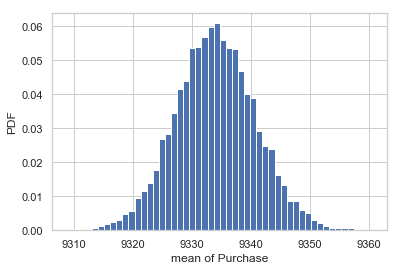

In [75]:
# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean of Purchase')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [73]:
np.percentile(bs_replicates, [2.5, 97.5])

array([9320.7775574 , 9347.65727631])